# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore")
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df=pd.read_csv('train.csv')


# Check Data

In [3]:
df.head()

,ID,Brand,VehicleModel,ManufacturingYear,Type,rating,color,Duty,fuel,CylinderCount,type of gear,capacity,Odometer,#airbags,price
0,2624,NaN,I have the fastest model ever.. yes you got it...,2017,WOOW Sedan,0.0,NaN,I had to pay a substantial $1249 levy on my ne...,Gas,4.0,R,2.5,75492 KM,1008,21012
1,14392,I love TOYOTA,NaN,NaN,Minivan3,5.0,Metallic,-,Gas,4.0 cyl,R,2.4,220000 KM,-96,11917
2,9822,hyundai,H1,2009,MINIVAN,0.0,Metallic,1185$,Dies,4.0,R,2.5,TOTAL 50653 km,4 count,22433
3,17123,opel,Corsa,NaN,Hatchback,5.0,Jet Black,-,NaN,4.0,auto,0,230000 KM,0,5645
4,11133,subaru,I own Outback.,2007,Hatchback,4.0,Sapphire Blue,-,Gas,4.0,NaN,2.5,131000 KM,4,10976


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 7000 non-null   int64  
 1   Brand              6294 non-null   object 
 2   VehicleModel       6303 non-null   object 
 3   ManufacturingYear  6305 non-null   object 
 4   Type               6315 non-null   object 
 5   rating             6310 non-null   float64
 6   color              4876 non-null   object 
 7   Duty               7000 non-null   object 
 8   fuel               6304 non-null   object 
 9   CylinderCount      7000 non-null   object 
 10  type of gear       6308 non-null   object 
 11  capacity           7000 non-null   object 
 12  Odometer           7000 non-null   object 
 13  #airbags           7000 non-null   object 
 14  price              7000 non-null   int64  
dtypes: float64(1), int64(2), object(12)
memory usage: 820.4+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,7000.0,9022.128714,5202.316292,1.0,4546.75,9044.5,13523.25,18013.0
rating,6310.0,2.559588,1.905482,-4.0,1.00,2.0,4.00,10.0
price,7000.0,14406.866429,11747.617978,3.0,5018.00,12544.0,20071.00,49889.0


In [6]:
df.describe(include='object')

,Brand,VehicleModel,ManufacturingYear,Type,color,Duty,fuel,CylinderCount,type of gear,capacity,Odometer,#airbags
count,6294,6303,6305,6315,4876,7000,6304,7000,6308,7000,7000,7000
unique,185,1480,555,81,16,1173,7,28,7,87,4964,321
top,toyota,Prius,2012,sedan,Jet Black,-,Gas,4.0,auto,2,0 km,12
freq,497,113,429,1160,1239,2108,3272,2638,2870,1261,79,830


In [7]:
df.duplicated().sum()

0

## Helper Functions for analysis

In [8]:
def cat_columns(df, column_name):
    """
    Analyzes a column in a DataFrame by displaying unique values, 
    count of null values, value counts, and a countplot.
    """
    print(f"{column_name} Column")
    print("=" * 50 + '\n')   
    
    print(f"Unique values in '{column_name}':\n{df[column_name].unique()}\n")
    
    print('-------------------------------------------------------------\n')

    print(f"Value counts in '{column_name}':\n{df[column_name].value_counts()}\n")
    
    print('-------------------------------------------------------------\n')

    print(f"Descriptive statistics for '{column_name}':\n{df[column_name].describe(include='object')}\n")
    
    print('-------------------------------------------------------------\n')

    print(f"Null values in '{column_name}': {df[column_name].isnull().sum()}\n")
    
    print('-------------------------------------------------------------\n')
    
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, y=column_name,order=df[column_name].value_counts()[:10].index, palette="viridis")
    plt.title(f"Countplot for '{column_name}'", fontsize=16)
    plt.xlabel("Count", fontsize=12)
    plt.ylabel(column_name, fontsize=12)
    plt.show()
    
    print('_______________________________________________________________________________________________________\n')

    

In [9]:
def num_columns(df, column_name):
    """
    Analyzes a column in a DataFrame by displaying unique values, 
    count of null values, value counts, and a countplot.
    """
    print(f"{column_name} Column")
    print("=" * 50 + '\n')   

    print(f"Unique values in '{column_name}':\n{df[column_name].unique()}\n")
    
    print('-------------------------------------------------------------\n')

    print(f"Value counts in '{column_name}':\n{df[column_name].value_counts()}\n")
    
    print('-------------------------------------------------------------\n')

    print(f"Descriptive statistics for '{column_name}':\n{df[column_name].describe()}\n")
    
    print('-------------------------------------------------------------\n')

    print(f"Null values in '{column_name}': {df[column_name].isnull().sum()}\n")
    
    print('-------------------------------------------------------------\n')
    
    plt.figure(figsize=(10, 6))
    plt.hist(df[column_name].dropna(),  color='#500073', edgecolor='black')
    plt.title(f"Histogram for '{column_name}'", fontsize=16)
    plt.xlabel(column_name, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    
    print('_______________________________________________________________________________________________________\n')


# Explore Categorical Columns

Brand Column

Unique values in 'Brand':
[nan 'I love TOYOTA' 'hyundai' 'opel' 'subaru' 'VOLKSWAGEN' 'FORD' 'Bmw'
 'jaguar' 'I love HONDA' 'mercedes-benz' 'I love FORD' 'honda' 'HYUNDAI'
 'NISSAN' 'toyota' 'volkswagen' 'lexus' 'ford' 'SSANGYONG' 'HONDA'
 'Hyundai' 'Toyota' 'BMW' 'MERCEDES-BENZ is the best'
 'I love MERCEDES-BENZ' 'SSANGYONG is the best' 'I love SUBARU'
 'ssangyong' 'TOYOTA is the best' 'nissan' 'kia' 'DAEWOO'
 'SUBARU is the best' 'TOYOTA' 'bmw' 'AUDI' 'CHEVROLET' 'jeep' 'SUBARU'
 'MERCEDES-BENZ' 'Mercedes-Benz' 'I love BMW' 'LEXUS' 'I love HYUNDAI'
 'NISSAN is the best' 'Opel' 'PORSCHE' 'MAZDA' 'I love NISSAN'
 'HYUNDAI is the best' 'chevrolet' 'mitsubishi' 'I love KIA' 'Chevrolet'
 'mazda' 'KIA' 'BMW is the best' 'gmc' 'I love LEXUS' 'MITSUBISHI'
 'I love MITSUBISHI' 'skoda' 'Lexus' 'Volkswagen' 'SUZUKI' 'Ford' 'JEEP'
 'OPEL' 'Honda' 'I love VOLKSWAGEN' 'fiat' 'FORD is the best' 'PEUGEOT'
 'VOLKSWAGEN is the best' 'audi' 'Kia' 'I love DODGE' 'mini' 'Mini' 'VAZ'
 'Niss

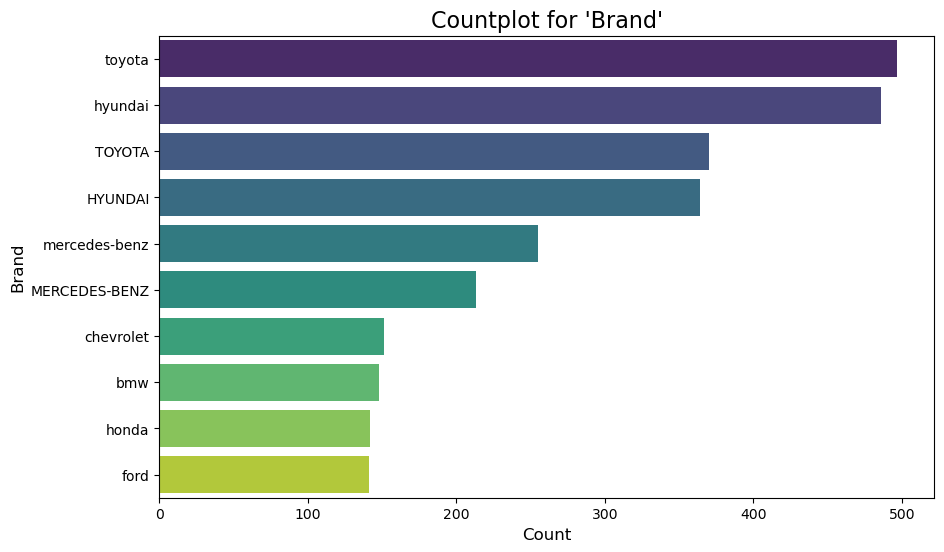

_______________________________________________________________________________________________________

VehicleModel Column

Unique values in 'VehicleModel':
["I have the fastest model ever.. yes you got it right it's Mazda 6 TOURING"
 nan 'H1' ... 'Navigator' 'my model which is RAV 4 L is the best'
 'I own X-type.']

-------------------------------------------------------------

Value counts in 'VehicleModel':
Prius                    113
Sonata                   104
Elantra                   96
FIT                       96
PRIUS                     89
                        ... 
Mazda 6 Grand Touring      1
I own Clio.                1
500 Abarth                 1
I own Quest.               1
I own X-type.              1
Name: VehicleModel, Length: 1480, dtype: int64

-------------------------------------------------------------

Descriptive statistics for 'VehicleModel':
count      6303
unique     1480
top       Prius
freq        113
Name: VehicleModel, dtype: object

------------

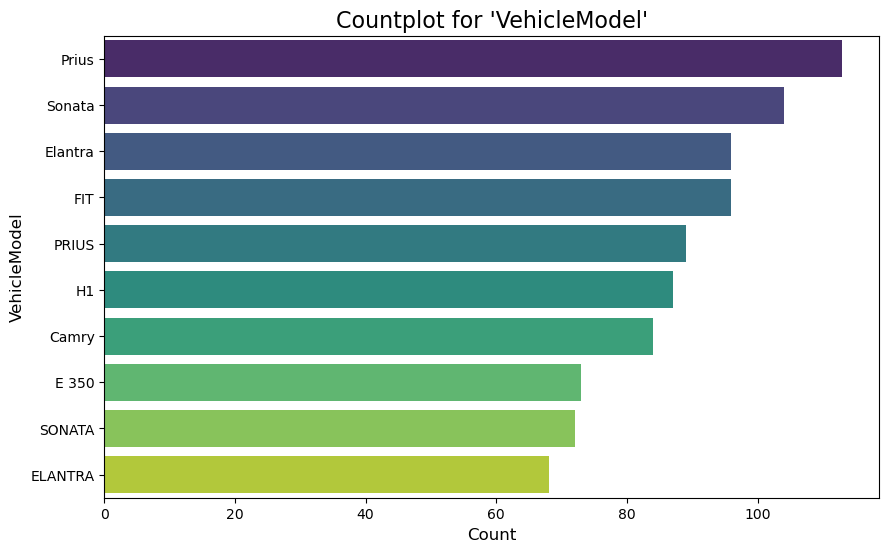

_______________________________________________________________________________________________________

ManufacturingYear Column

Unique values in 'ManufacturingYear':
['2017' nan '2009' '2007' '3010' '1999' '2012' '2011' '2014' '2015' '2006'
 '2105' '2013,' '2010' '2017{' '1-1-2003' '2016' '1998' '2018' '2008'
 '2015+' '2012"' '2013' '2111' '1-1-2020' '2005' '2017*' '2004' '2016.'
 '2015#' '1910' '2017&' '1914' '1-1-2013' '3009' '2009&' '2018}'
 '14years old' '1-1-2014' '2001' '2015`' '2112' '1997' '2014@' '1917'
 '2014+' '2013*' '1-1-2011' '1-1-2008' '2012,' '2003' '1-1-2007'
 '15years old' '1916' '1-1-2012' '1912' '2010~' '2020' '2002>' '2110'
 '2005>' '2115' '1-1-2005' '2009%' '2019' '10years old' '1-1-2002' '2015@'
 '3013' '1907' '2010*' '2000' '1996_' '12years old' '2011;' '2017_'
 '13years old' '3014' '2017(' '2011,' '11years old' '7years old'
 '1-1-2010' '3004' '1996|' '1913' '2014|' '1-1-2016' '2016[' '1900'
 "2009'" '1902' '2117' '1-1-2009' '8years old' '2118' '1999[' '1995'

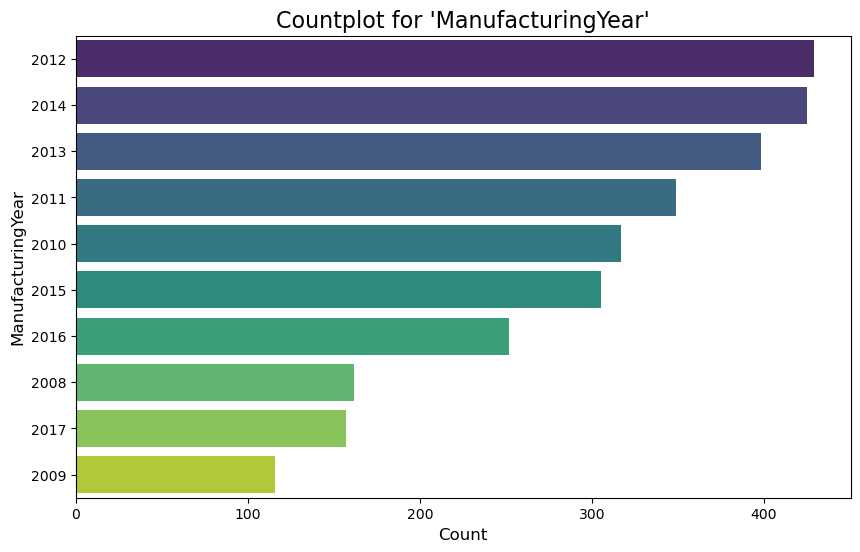

_______________________________________________________________________________________________________

Type Column

Unique values in 'Type':
['WOOW Sedan' 'Minivan3' 'MINIVAN' 'Hatchback' 'sedan' 'SEDAN' 'Pickup3'
 'jeep' 'Minivan' 'HATCHBACK' 'minivan' 'hatchback' 'JEEP' 'microbus' nan
 'Jeep1' 'Sedan0' 'Coupe' 'Sedan3' 'Hatchback3' 'Sedan' 'Jeep0'
 'WOOW Hatchback' 'WOOW Jeep' 'Hatchback1' 'WOOW Coupe' 'UNIVERSAL'
 'Hatchback2' 'Jeep2' 'Hatchback4' 'Sedan4' 'Sedan1' 'Jeep' 'WOOW Minivan'
 'Jeep4' 'Hatchback0' 'Goods Wagon' 'universal' 'WOOW Goods wagon'
 'MICROBUS' 'Minivan0' 'Coupe1' 'goods wagon' 'pickup' 'Jeep3' 'Sedan2'
 'coupe' 'Pickup1' 'COUPE' 'CABRIOLET' 'Universal0' 'Microbus'
 'WOOW Universal' 'Goods wagon1' 'WOOW Microbus' 'Minivan2' 'GOODS WAGON'
 'cabriolet' 'Goods wagon0' 'Coupe4' 'Universal' 'Goods wagon2'
 'Microbus4' 'Coupe3' 'Goods wagon4' 'Limousine' 'PICKUP' 'Microbus0'
 'Coupe0' 'Goods wagon3' 'Universal3' 'Minivan1' 'Microbus3' 'Microbus1'
 'Universal2' 'Cabri

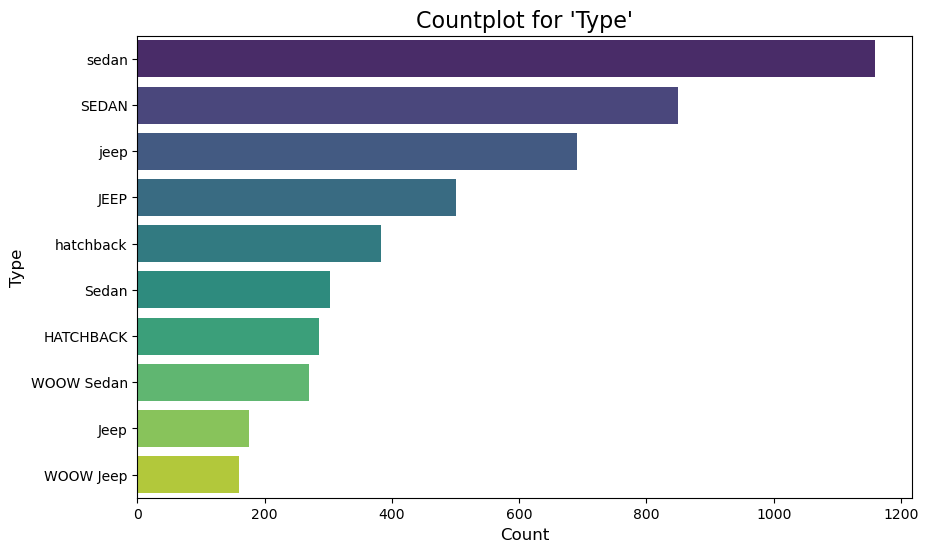

_______________________________________________________________________________________________________

color Column

Unique values in 'color':
[nan 'Metallic' 'Jet Black' 'Sapphire Blue' 'Pearl White' 'Charcoal'
 'Gold' 'Crimson' 'Tangerine' 'Sand' 'Emerald Green' 'Lemon Yellow'
 'Chocolate' 'Sky Blue' 'Ruby Red' 'Rose Pink' 'Royal Purple']

-------------------------------------------------------------

Value counts in 'color':
Jet Black        1239
Pearl White      1083
Metallic          995
Charcoal          628
Sapphire Blue     371
Crimson           166
Emerald Green      77
Tangerine          66
Gold               49
Chocolate          47
Ruby Red           44
Sky Blue           35
Sand               34
Lemon Yellow       30
Royal Purple        7
Rose Pink           5
Name: color, dtype: int64

-------------------------------------------------------------

Descriptive statistics for 'color':
count          4876
unique           16
top       Jet Black
freq           1239
Name: co

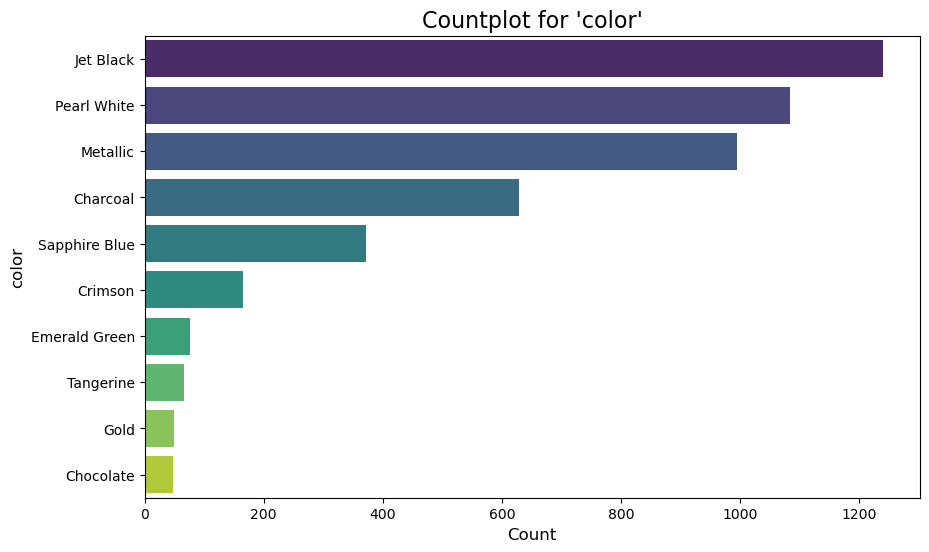

_______________________________________________________________________________________________________

Duty Column

Unique values in 'Duty':
['I had to pay a substantial $1249 levy on my new car purchase.' '-'
 '1185$' ... '2909$' 'The car levy amounted is 893 per vehicle.' '965']

-------------------------------------------------------------

Value counts in 'Duty':
-                                                               2108
640                                                               48
765                                                               45
891                                                               44
765 pound                                                         43
                                                                ... 
I had to pay a substantial $431 levy on my new car purchase.       1
We were surprised by the hefty $247 levy on imported cars.         1
419 pound                                                          1
We were

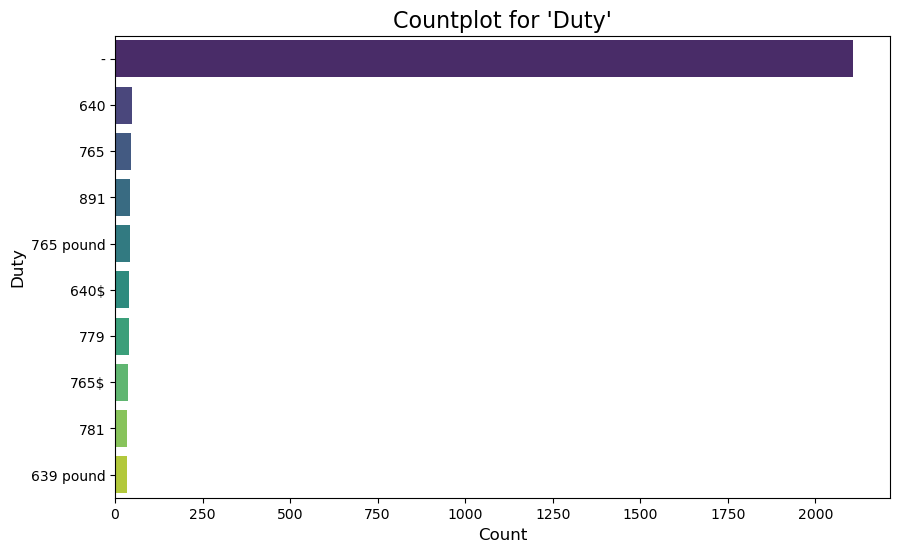

_______________________________________________________________________________________________________

fuel Column

Unique values in 'fuel':
['Gas' 'Dies' nan 'Electric Hybrid' 'other' 'Natural Gas' 'hyb' 'others']

-------------------------------------------------------------

Value counts in 'fuel':
Gas                3272
Dies               1291
Electric Hybrid    1250
other               307
Natural Gas         157
hyb                  26
others                1
Name: fuel, dtype: int64

-------------------------------------------------------------

Descriptive statistics for 'fuel':
count     6304
unique       7
top        Gas
freq      3272
Name: fuel, dtype: object

-------------------------------------------------------------

Null values in 'fuel': 696

-------------------------------------------------------------



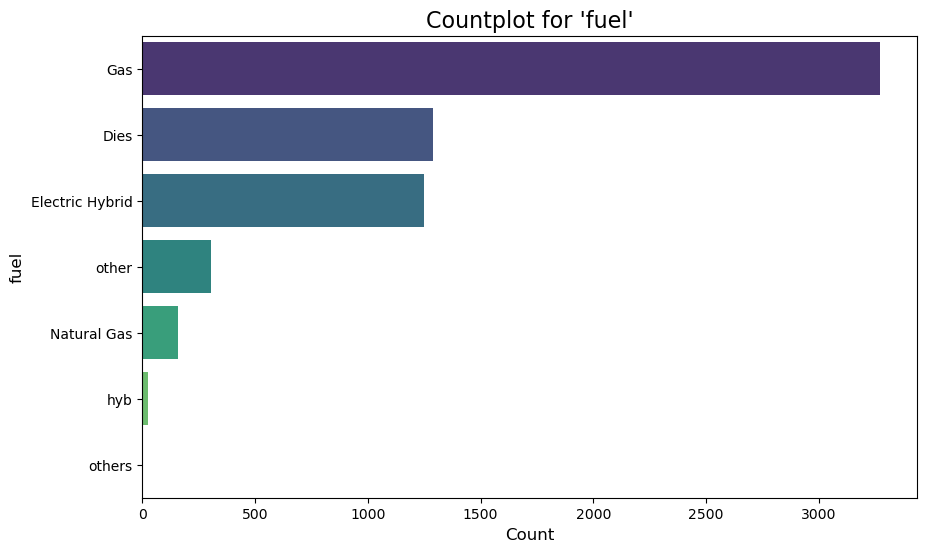

_______________________________________________________________________________________________________

CylinderCount Column

Unique values in 'CylinderCount':
['4.0' '4.0 cyl' '8.0' '8.0 cyl' '6.0 cyl' '6.0' '14.0' '0' '5.0' '16.0'
 '18.0' '3.0' '3.0 cyl' '15.0' '10.0' '11.0' '2.0 cyl' '5.0 cyl' '9.0'
 '10.0 cyl' '1.0' '12.0 cyl' '2.0' '16.0 cyl' '13.0' '1.0 cyl' '12.0'
 '7.0']

-------------------------------------------------------------

Value counts in 'CylinderCount':
4.0         2638
4.0 cyl     1631
0            718
6.0          627
14.0         525
6.0 cyl      344
8.0          161
16.0         107
8.0 cyl       94
5.0           29
18.0          26
5.0 cyl       19
3.0           16
3.0 cyl       12
12.0           8
2.0            7
1.0            7
15.0           6
2.0 cyl        6
12.0 cyl       4
1.0 cyl        3
10.0           3
16.0 cyl       2
11.0           2
7.0            2
10.0 cyl       1
13.0           1
9.0            1
Name: CylinderCount, dtype: int64

---------

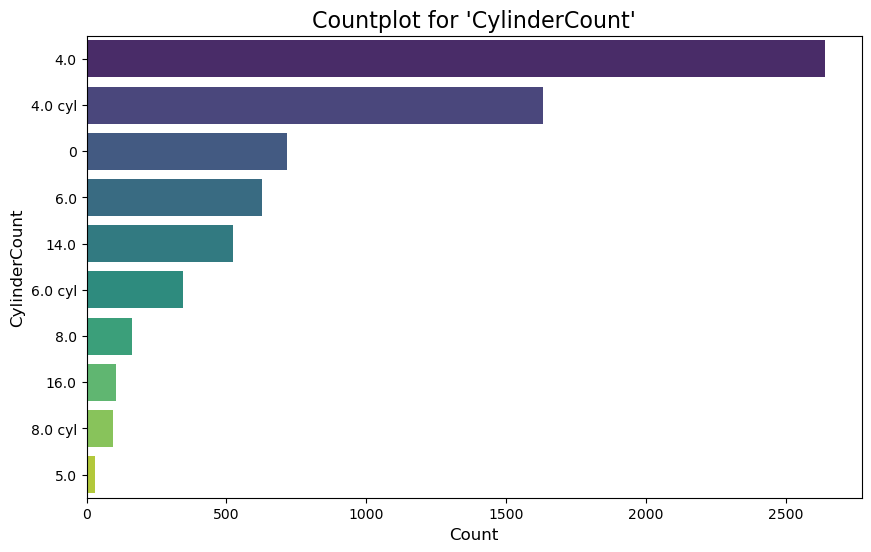

_______________________________________________________________________________________________________

type of gear Column

Unique values in 'type of gear':
['R' 'auto' nan 'manual' 'others' 'MANUAL' 'AUTO' 'gear']

-------------------------------------------------------------

Value counts in 'type of gear':
auto      2870
others    1228
gear       639
R          635
AUTO       553
manual     320
MANUAL      63
Name: type of gear, dtype: int64

-------------------------------------------------------------

Descriptive statistics for 'type of gear':
count     6308
unique       7
top       auto
freq      2870
Name: type of gear, dtype: object

-------------------------------------------------------------

Null values in 'type of gear': 692

-------------------------------------------------------------



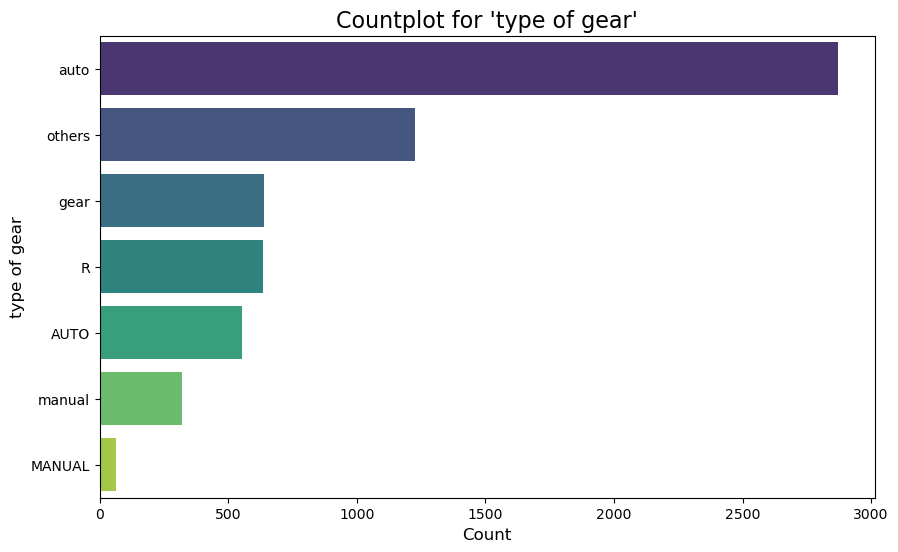

_______________________________________________________________________________________________________

capacity Column

Unique values in 'capacity':
['2.5' '2.4' '0' '2' '5' '3' '1.3' '1.5' '1.6' '1.8' '3.5' '2.7 Turbo'
 '1.8 Turbo' '2.7' '2.5 Turbo' '3.3' '1.7' '2.2' '2.2 Turbo' '4' '1.4'
 '4.8' '1.2' '2.3' '1.6 Turbo' '4.7' '2.0 Turbo' '2.8 Turbo' '3.2' '5.5'
 '6.2' '4.6' '3.7' '1' '3.0 Turbo' '1.9 Turbo' '2.4 Turbo' '5.0 Turbo'
 '3.6' '4.4' '1.4 Turbo' '2.6' '3.2 Turbo' '0.6 Turbo' '1.5 Turbo' '6.3'
 '3.8' '5.7' '1.9' '4.5' '5.9' '0.3' '5.5 Turbo' '4.5 Turbo' '4.2'
 '3.5 Turbo' '0.4' '0.1' '0.2' '0.8' '4.4 Turbo' '2.3 Turbo' '4.7 Turbo'
 '2.9 Turbo' '1.7 Turbo' '6.7' '2.1 Turbo' '2.8' '2.9' '0.7' '2.1'
 '1.3 Turbo' '5.4' '5.4 Turbo' '3.4' '5.3' '4.3' '0.9' '0.8 Turbo' '0.6'
 '3.6 Turbo' '1.0 Turbo' '5.6' '5.2' '1.1' '4.8 Turbo' '0.5']

-------------------------------------------------------------

Value counts in 'capacity':
2            1261
2.5           765
0             714
1.

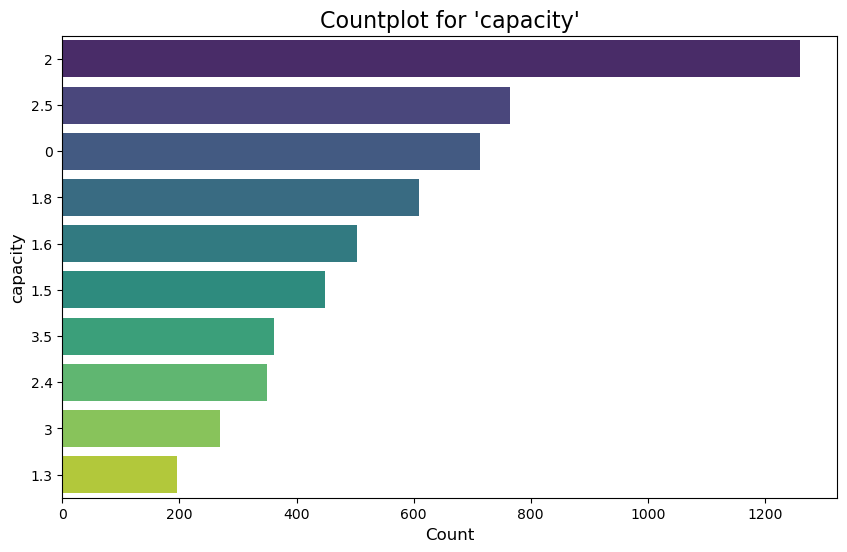

_______________________________________________________________________________________________________

Odometer Column

Unique values in 'Odometer':
['75492 KM' '220000 KM' 'TOTAL 50653 km' ... '156802  kilo' '314373 KM'
 '131627']

-------------------------------------------------------------

Value counts in 'Odometer':
0 km                79
0  kilo             52
0 KM                48
0                   30
TOTAL 0 km          30
                    ..
88900                1
16500                1
224643 KM            1
64274  kilometer     1
131627               1
Name: Odometer, Length: 4964, dtype: int64

-------------------------------------------------------------

Descriptive statistics for 'Odometer':
count     7000
unique    4964
top       0 km
freq        79
Name: Odometer, dtype: object

-------------------------------------------------------------

Null values in 'Odometer': 0

-------------------------------------------------------------



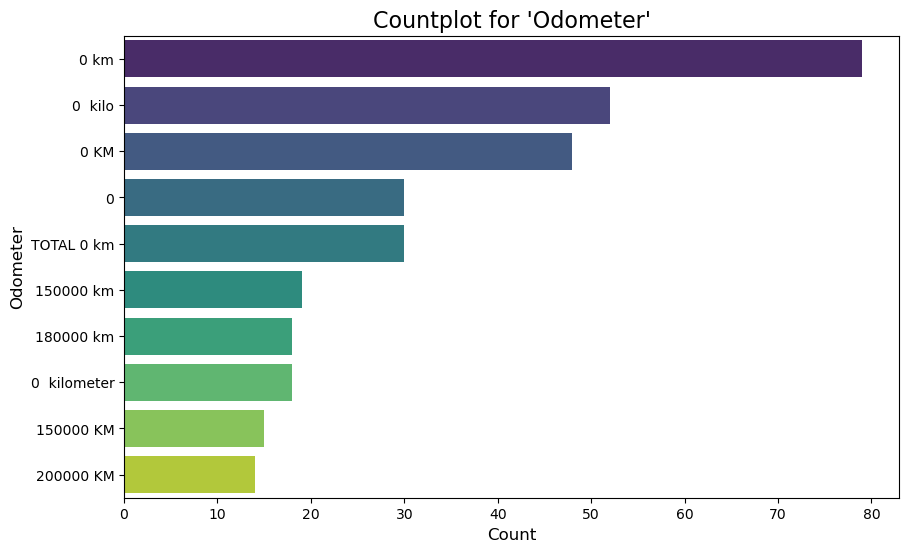

_______________________________________________________________________________________________________

#airbags Column

Unique values in '#airbags':
['1008' '-96' '4 count' '0  ' '4  ' '12' '6 count' '8' '4' '12,' '6~'
 '106' '6' '2' '8 bags' '12<' '0' 'ONLY 10 AIRBAG' '12 count'
 'ONLY 4 AIRBAG' '1012' '10' '12 bags' '4 bags' 'ONLY 8 AIRBAG' '5'
 '8 count' 'ONLY 0 AIRBAG' '12/' 'ONLY 6 AIRBAG' '12)' '-100' '8='
 'ONLY 12 AIRBAG' '12  ' '108' '4<' '-94' '12|' '6 bags' '2 count' '12`'
 '4]' '8$' '-88' '10 count' '6  ' '12>' '112' '6(' '11' '110' '4@' '4&'
 '0 count' '4{' '4#' '104' '1005' '12~' '4!' '2  ' '5 count' '16 bags'
 '6?' '1' '-92' '100' '1004' '9' '14' '4$' '4,' '12!' '8  ' '-90' '12&'
 '6/' '1 count' 'ONLY 2 AIRBAG' '0~' "8'" '2 bags' '4[' '10 bags' '8&'
 '0 bags' '12#' "4'" '2<' '0#' "0'" '13' '2(' '2*' '4"' '4(' '0-' '8:'
 '2,' '8@' 'ONLY 5 AIRBAG' '-98' '4_' '0"' '0[' '10  ' '7' '12}' '1002'
 '6"' '6_' '6:' '4;' '1000' '2:' '12$' '4`' '8(' '7  ' '12+' '10+' '0}'
 '12;' '

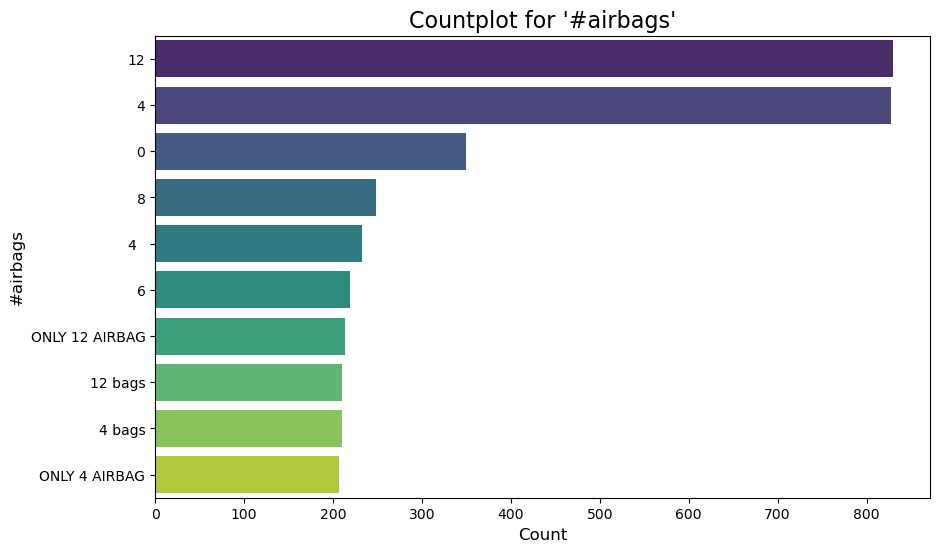

_______________________________________________________________________________________________________



In [10]:
for i in df.columns:
    if df[i].dtype=='object':
        cat_columns(df,i)

**● There are null values in Brand, VehicleModel,Type, ManufacturingYear, Fuel, TYPE OF GEAR, and Rating columns**

**● Color column have many null vlues around third of the data**

**● In Brand Column,there are some words like (I love , is the best ) ,and uppercase and lowercase like( TOYOTA,toyota)**

**● In VeivhleModel column,there are some exepresions will deal with  it ,and handle uppercase and lowercase**

**● In ManufacturingYear column, remove any special characters or punctuation marks ,then make it int**
 
**● In Type column, there are jeep1 and 2.. in some types are there useful or relevant or not..? , hanlde uppercase and lowercase**

**● In Duty column, remove any word or expression and there is  make (-) vlaue-> null ,then make it integer column**

**● In Fuel column,handle others and other, and i think hybrid equal to hyb**
 
**● In CylinderCount column, remove (cyl), then make it integer column**

**● In Type of gear column, handle uppercase and lowercase like auto=AUTO and manual==MANUAL**

**● In Odometer column, remove km and any word like this,then make it integer column**

**● In Capacity column,will remove (TERPO) ,then make it float column**

**● In #aribags column,will rename it to be aribags , remaove any special characters or punctuation marks, and then make it integer column**


# Explore Numerical Columns

ID Column

Unique values in 'ID':
[ 2624 14392  9822 ...  7223 12184 17637]

-------------------------------------------------------------

Value counts in 'ID':
2624     1
12791    1
1287     1
8570     1
7855     1
        ..
7105     1
3546     1
17713    1
2135     1
17637    1
Name: ID, Length: 7000, dtype: int64

-------------------------------------------------------------

Descriptive statistics for 'ID':
count     7000.000000
mean      9022.128714
std       5202.316292
min          1.000000
25%       4546.750000
50%       9044.500000
75%      13523.250000
max      18013.000000
Name: ID, dtype: float64

-------------------------------------------------------------

Null values in 'ID': 0

-------------------------------------------------------------



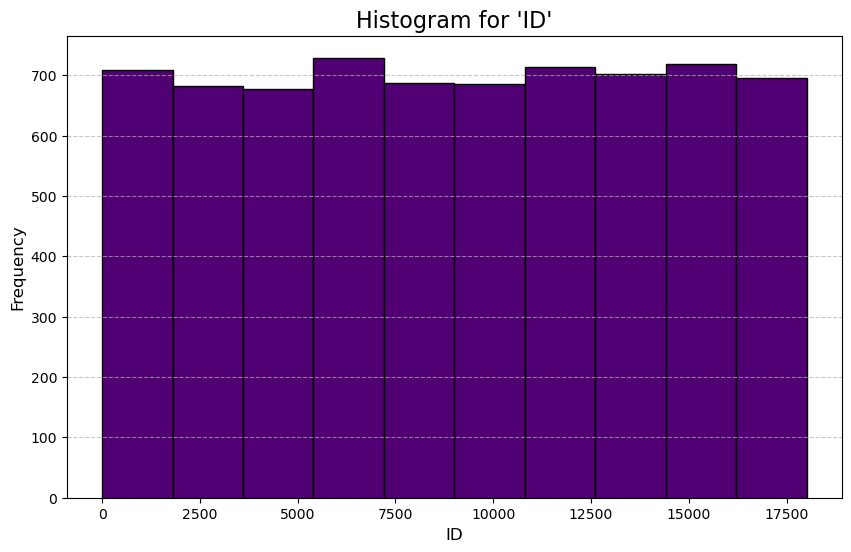

_______________________________________________________________________________________________________

rating Column

Unique values in 'rating':
[ 0.  5.  4. nan  2.  6.  3.  8.  1.  7. -1. -2. -3.  9. 10. -4.]

-------------------------------------------------------------

Value counts in 'rating':
 2.0     1248
 3.0     1175
 1.0      935
 4.0      925
 0.0      857
 5.0      609
 6.0      274
-1.0      108
 7.0       94
 8.0       35
-2.0       30
-3.0       11
 9.0        7
 10.0       1
-4.0        1
Name: rating, dtype: int64

-------------------------------------------------------------

Descriptive statistics for 'rating':
count    6310.000000
mean        2.559588
std         1.905482
min        -4.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        10.000000
Name: rating, dtype: float64

-------------------------------------------------------------

Null values in 'rating': 690

-------------------------------------------------------------



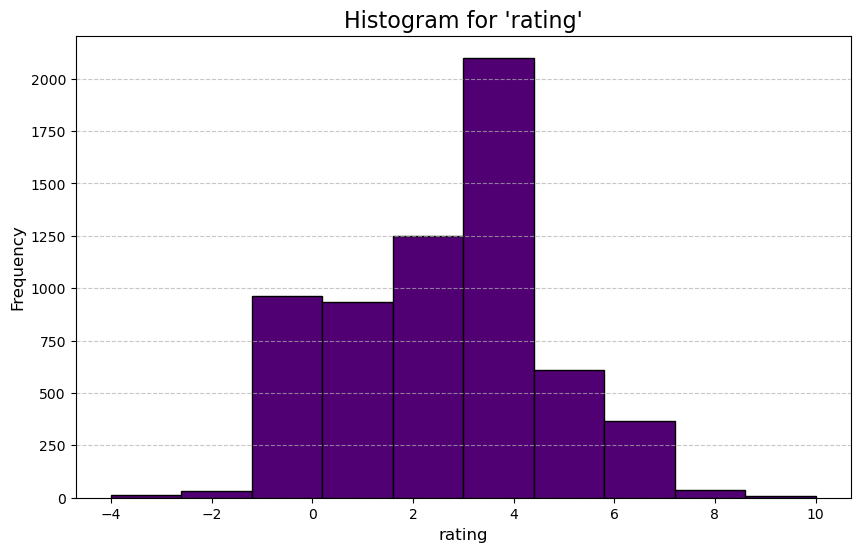

_______________________________________________________________________________________________________

price Column

Unique values in 'price':
[21012 11917 22433 ... 27000  6752 18362]

-------------------------------------------------------------

Value counts in 'price':
15681    121
18817     98
314       97
12544     95
392       94
        ... 
38822      1
31819      1
19500      1
16399      1
18362      1
Name: price, Length: 1218, dtype: int64

-------------------------------------------------------------

Descriptive statistics for 'price':
count     7000.000000
mean     14406.866429
std      11747.617978
min          3.000000
25%       5018.000000
50%      12544.000000
75%      20071.000000
max      49889.000000
Name: price, dtype: float64

-------------------------------------------------------------

Null values in 'price': 0

-------------------------------------------------------------



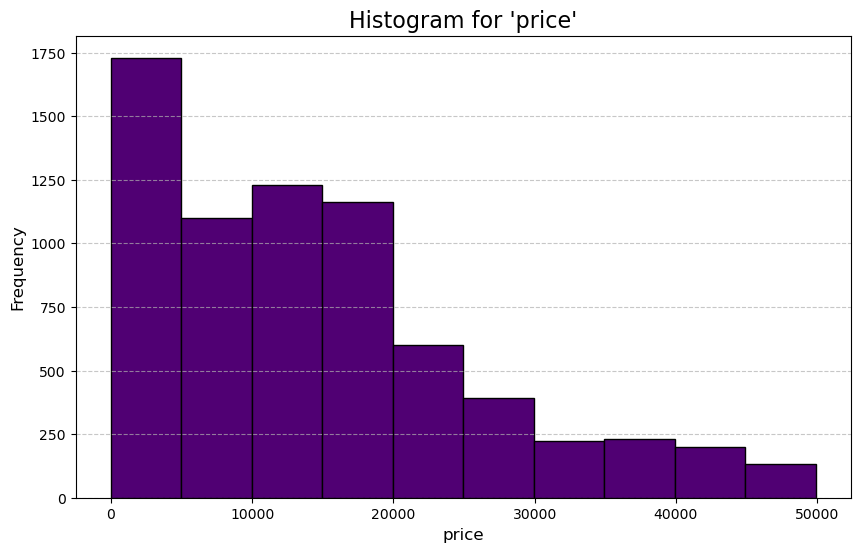

_______________________________________________________________________________________________________



In [11]:
for i in df.columns:
    if df[i].dtype!='object':
        num_columns(df,i)

**● Remove ID Column**

**● The price colmn is right skewed**

**● There are outliers and there are also very small price(3$)!**

# Cleaning

#### Type Column

In [12]:
df['Type'].unique()

array(['WOOW Sedan', 'Minivan3', 'MINIVAN', 'Hatchback', 'sedan', 'SEDAN',
       'Pickup3', 'jeep', 'Minivan', 'HATCHBACK', 'minivan', 'hatchback',
       'JEEP', 'microbus', nan, 'Jeep1', 'Sedan0', 'Coupe', 'Sedan3',
       'Hatchback3', 'Sedan', 'Jeep0', 'WOOW Hatchback', 'WOOW Jeep',
       'Hatchback1', 'WOOW Coupe', 'UNIVERSAL', 'Hatchback2', 'Jeep2',
       'Hatchback4', 'Sedan4', 'Sedan1', 'Jeep', 'WOOW Minivan', 'Jeep4',
       'Hatchback0', 'Goods Wagon', 'universal', 'WOOW Goods wagon',
       'MICROBUS', 'Minivan0', 'Coupe1', 'goods wagon', 'pickup', 'Jeep3',
       'Sedan2', 'coupe', 'Pickup1', 'COUPE', 'CABRIOLET', 'Universal0',
       'Microbus', 'WOOW Universal', 'Goods wagon1', 'WOOW Microbus',
       'Minivan2', 'GOODS WAGON', 'cabriolet', 'Goods wagon0', 'Coupe4',
       'Universal', 'Goods wagon2', 'Microbus4', 'Coupe3', 'Goods wagon4',
       'Limousine', 'PICKUP', 'Microbus0', 'Coupe0', 'Goods wagon3',
       'Universal3', 'Minivan1', 'Microbus3', 'Microbus1', 'Un

In [13]:
def clean_type(car_type):
    if pd.isna(car_type):  # Check for NaN values
        return car_type
    car_type = car_type.lower()  # Convert to lowercase
    car_type = car_type.replace('woow ', '')  # Remove the "WOOW" prefix
    return car_type.strip()  # Remove leading/trailing whitespace

# Apply the function to the column
df['Type'] = df['Type'].apply(clean_type)

df['Type'].unique()

array(['sedan', 'minivan3', 'minivan', 'hatchback', 'pickup3', 'jeep',
       'microbus', nan, 'jeep1', 'sedan0', 'coupe', 'sedan3',
       'hatchback3', 'jeep0', 'hatchback1', 'universal', 'hatchback2',
       'jeep2', 'hatchback4', 'sedan4', 'sedan1', 'jeep4', 'hatchback0',
       'goods wagon', 'minivan0', 'coupe1', 'pickup', 'jeep3', 'sedan2',
       'pickup1', 'cabriolet', 'universal0', 'goods wagon1', 'minivan2',
       'goods wagon0', 'coupe4', 'goods wagon2', 'microbus4', 'coupe3',
       'goods wagon4', 'limousine', 'microbus0', 'coupe0', 'goods wagon3',
       'universal3', 'minivan1', 'microbus3', 'microbus1', 'universal2',
       'cabriolet1', 'minivan4', 'universal4', 'coupe2', 'pickup0'],
      dtype=object)

In [14]:
#Remove digits directly using str.replace()
df['Type'] = df['Type'].replace('jeep','jeep0')
df['Type'] = df['Type'].replace('coupe','coupe0')
df['Type'] = df['Type'].replace('minivan','minivan0')
df['Type'] = df['Type'].replace('sedan','sedan0')
df['Type'] = df['Type'].replace('universal','universal0')
df['Type'] = df['Type'].replace('microbus','microbus0')
df['Type'] = df['Type'].replace('pickup','pikcup0')
df['Type'] = df['Type'].replace('hatchback','hatchback0')
df['Type'] = df['Type'].replace('goods wagon','goods wagon0')
df['Type'] = df['Type'].replace('cabriolet','cabriolet0')


df['Type'].unique()

array(['sedan0', 'minivan3', 'minivan0', 'hatchback0', 'pickup3', 'jeep0',
       'microbus0', nan, 'jeep1', 'coupe0', 'sedan3', 'hatchback3',
       'hatchback1', 'universal0', 'hatchback2', 'jeep2', 'hatchback4',
       'sedan4', 'sedan1', 'jeep4', 'goods wagon0', 'coupe1', 'pikcup0',
       'jeep3', 'sedan2', 'pickup1', 'cabriolet0', 'goods wagon1',
       'minivan2', 'coupe4', 'goods wagon2', 'microbus4', 'coupe3',
       'goods wagon4', 'limousine', 'goods wagon3', 'universal3',
       'minivan1', 'microbus3', 'microbus1', 'universal2', 'cabriolet1',
       'minivan4', 'universal4', 'coupe2', 'pickup0'], dtype=object)

#### Brand Column

In [15]:
df['Brand'].unique()

array([nan, 'I love TOYOTA', 'hyundai', 'opel', 'subaru', 'VOLKSWAGEN',
       'FORD', 'Bmw', 'jaguar', 'I love HONDA', 'mercedes-benz',
       'I love FORD', 'honda', 'HYUNDAI', 'NISSAN', 'toyota',
       'volkswagen', 'lexus', 'ford', 'SSANGYONG', 'HONDA', 'Hyundai',
       'Toyota', 'BMW', 'MERCEDES-BENZ is the best',
       'I love MERCEDES-BENZ', 'SSANGYONG is the best', 'I love SUBARU',
       'ssangyong', 'TOYOTA is the best', 'nissan', 'kia', 'DAEWOO',
       'SUBARU is the best', 'TOYOTA', 'bmw', 'AUDI', 'CHEVROLET', 'jeep',
       'SUBARU', 'MERCEDES-BENZ', 'Mercedes-Benz', 'I love BMW', 'LEXUS',
       'I love HYUNDAI', 'NISSAN is the best', 'Opel', 'PORSCHE', 'MAZDA',
       'I love NISSAN', 'HYUNDAI is the best', 'chevrolet', 'mitsubishi',
       'I love KIA', 'Chevrolet', 'mazda', 'KIA', 'BMW is the best',
       'gmc', 'I love LEXUS', 'MITSUBISHI', 'I love MITSUBISHI', 'skoda',
       'Lexus', 'Volkswagen', 'SUZUKI', 'Ford', 'JEEP', 'OPEL', 'Honda',
       'I love VOLKSW

In [16]:
def clean_brand(brand):
    if pd.isna(brand):  # Check for NaN values
        return brand
    brand = brand.lower()  # Convert to lowercase
    brand = brand.replace('i love ', '').replace(' is the best', '')  # Remove phrases
    return brand.strip()

# Apply the function to the column
df['Brand'] = df['Brand'].apply(clean_brand)
df['Brand'].unique()

array([nan, 'toyota', 'hyundai', 'opel', 'subaru', 'volkswagen', 'ford',
       'bmw', 'jaguar', 'honda', 'mercedes-benz', 'nissan', 'lexus',
       'ssangyong', 'kia', 'daewoo', 'audi', 'chevrolet', 'jeep',
       'porsche', 'mazda', 'mitsubishi', 'gmc', 'skoda', 'suzuki', 'fiat',
       'peugeot', 'dodge', 'mini', 'vaz', 'gaz', 'cadillac', 'uaz',
       'seat', 'rover', 'chrysler', 'land rover', 'infiniti', 'სხვა',
       'alfa romeo', 'renault', 'greatwall', 'buick', 'volvo', 'lincoln',
       'isuzu', 'scion', 'rolls-royce', 'citroen', 'pontiac', 'acura',
       'daihatsu', 'moskvich', 'mercury', 'maserati'], dtype=object)

In [17]:
df['Brand'] = df['Brand'].replace('სხვა', 'other')
df['Brand'].unique()

array([nan, 'toyota', 'hyundai', 'opel', 'subaru', 'volkswagen', 'ford',
       'bmw', 'jaguar', 'honda', 'mercedes-benz', 'nissan', 'lexus',
       'ssangyong', 'kia', 'daewoo', 'audi', 'chevrolet', 'jeep',
       'porsche', 'mazda', 'mitsubishi', 'gmc', 'skoda', 'suzuki', 'fiat',
       'peugeot', 'dodge', 'mini', 'vaz', 'gaz', 'cadillac', 'uaz',
       'seat', 'rover', 'chrysler', 'land rover', 'infiniti', 'other',
       'alfa romeo', 'renault', 'greatwall', 'buick', 'volvo', 'lincoln',
       'isuzu', 'scion', 'rolls-royce', 'citroen', 'pontiac', 'acura',
       'daihatsu', 'moskvich', 'mercury', 'maserati'], dtype=object)

#### VehicleModel Column

In [18]:
df['VehicleModel'].unique()

array(["I have the fastest model ever.. yes you got it right it's Mazda 6 TOURING",
       nan, 'H1', ..., 'Navigator',
       'my model which is RAV 4 L is the best', 'I own X-type.'],
      dtype=object)

In [19]:
df['VehicleModel'].nunique()

1480

In [20]:
# Define a function to clean text and handle mixed-language cases
def clean_vehicle_model(text):
    if isinstance(text, str):  # Check if the value is a string
        # Remove phrases like "I own ..." or "it's ..."
        text = re.sub(r"(?i)\bi own\b.*", '', text)  # Remove "I own..." phrases
        text = re.sub(r"^.*model.*is.*", '', text, flags=re.IGNORECASE)  # Remove "model is..." phrases
        text = re.sub(r"(?i)^.*it's\s+", '', text)  # Remove "it's ..." phrases
        
        # Remove unnecessary words and extra spaces
        text = text.strip()
        text = text.lower()  # Convert to lowercase
        
        # Check if it contains a vehicle model (e.g., alphanumeric with spaces)
        match = re.search(r"[a-zA-Z0-9\s]+", text)
        if match:
            text = match.group(0)  # Keep only the alphanumeric part
        
    return text
# Apply the function to the 'VehicleModel' column
df['VehicleModel'] = df['VehicleModel'].apply(clean_vehicle_model)
df['VehicleModel'].nunique()

612

In [21]:
df['VehicleModel'].unique()

array(['mazda 6 touring', nan, 'h1', 'corsa', '', 'e 200', 'f150', 'x6',
       'xj', 'fit', 'a 200', 'elantra', 'presage rider', 'prius',
       'golf gti', 'transit 100ld', 'actyon', 'astra', 'insight', 'camry',
       'highlander', '330', 'corolla', 'e 350', 'c 250', 'forester l',
       'camry hybrid', 'optima', 'escape', 'e 220', 'altima', 'vito',
       'rs7', 'korando', 'sonata', 'aqua', 'vectra', 'rexton', '328',
       'x5', 'prius c', 'forester', 'odyssey', 'gla 250', 'rx 450',
       'tucson', 'march', 'zafira', 'elantra gt', 'cayenne s', '616',
       'tiida', 'c 240', 'tucson limited', '528', 'captiva', 'elysion 3',
       'h1 starixs', 'santa fe', 'focus', 'orlando', 'rav 4', 'gx 470',
       'x', 'cx', 'juke', 'gle 63 amg', 'prius s', '520', 'prius 3',
       'prius v', 'land cruiser prado', 'yukon', 'ls 460', 'airtrek',
       'outlander', 'octavia', 'niva', 'ct 200h', 'picanto', 'chr',
       'compass', 'transit', 'veracruz', 'cr', 'ml 350 ml350', 'volt',
       'kicks

In [22]:
df['VehicleModel'] = df['VehicleModel'].replace('', np.nan)
df['VehicleModel'] = df['VehicleModel'].replace( 'Prius','Prius', regex=True)

In [23]:
df['VehicleModel'].nunique()

611

In [24]:
df['VehicleModel'].value_counts()[:50]

prius         260
sonata        244
elantra       213
camry         194
fit           119
tucson        104
h1            104
e 350          98
santa fe       95
aqua           84
x5             76
cruze          68
fusion         61
optima         57
highlander     57
transit        50
actyon         47
jetta          45
ml 350         44
rav 4          42
rx 450         41
escape         36
juke           36
insight        36
gx 460         34
forester       34
rexton         34
astra          34
captiva        32
gx 470         30
civic          29
orlando        28
lacetti        26
ct 200h        25
volt           24
passat         22
chr            22
328            20
prius c        20
malibu         20
e 300          19
a4             18
focus          18
golf           17
genesis        17
corolla        17
tacoma         17
gla 250        17
vito           17
vectra         17
Name: VehicleModel, dtype: int64

#### ManufacturingYear Column

In [25]:
df['ManufacturingYear'].unique()

array(['2017', nan, '2009', '2007', '3010', '1999', '2012', '2011',
       '2014', '2015', '2006', '2105', '2013,', '2010', '2017{',
       '1-1-2003', '2016', '1998', '2018', '2008', '2015+', '2012"',
       '2013', '2111', '1-1-2020', '2005', '2017*', '2004', '2016.',
       '2015#', '1910', '2017&', '1914', '1-1-2013', '3009', '2009&',
       '2018}', '14years old', '1-1-2014', '2001', '2015`', '2112',
       '1997', '2014@', '1917', '2014+', '2013*', '1-1-2011', '1-1-2008',
       '2012,', '2003', '1-1-2007', '15years old', '1916', '1-1-2012',
       '1912', '2010~', '2020', '2002>', '2110', '2005>', '2115',
       '1-1-2005', '2009%', '2019', '10years old', '1-1-2002', '2015@',
       '3013', '1907', '2010*', '2000', '1996_', '12years old', '2011;',
       '2017_', '13years old', '3014', '2017(', '2011,', '11years old',
       '7years old', '1-1-2010', '3004', '1996|', '1913', '2014|',
       '1-1-2016', '2016[', '1900', "2009'", '1902', '2117', '1-1-2009',
       '8years old', '2

In [26]:
#remove any special character and make it int column
df['ManufacturingYear'] = df['ManufacturingYear'].replace(r'[^0-9.-]', '', regex=True)

# Convert to numeric (this will safely handle any remaining non-numeric entries as NaN)
df['ManufacturingYear'] = pd.to_numeric(df['ManufacturingYear'], errors='coerce').astype(float)
df['ManufacturingYear'].unique()

array([2017.,   nan, 2009., 2007., 3010., 1999., 2012., 2011., 2014.,
       2015., 2006., 2105., 2013., 2010., 2016., 1998., 2018., 2008.,
       2111., 2005., 2004., 1910., 1914., 3009.,   14., 2001., 2112.,
       1997., 1917., 2003.,   15., 1916., 1912., 2020., 2002., 2110.,
       2115., 2019.,   10., 3013., 1907., 2000., 1996.,   12.,   13.,
       3014.,   11.,    7., 3004., 1913., 1900., 1902., 2117.,    8.,
       2118., 1995.,    6., 2113., 3012., 1915.,    9., 1911.,   21.,
       2116., 2098.,   26., 1918., 2114., 3008., 3006.,   28., 2107.,
       2119., 1908.,   24., 2099.,   20., 1985., 1909., 3007., 2103.,
         23., 1905.,   33., 1983., 3011., 2104., 3015., 1992., 1904.,
       1993.,   17., 1994., 1988., 3017.,   25., 1898., 1903., 3018.,
       2998., 3016.,   19.,   16., 1982.,   29., 2108.,   18.,    5.,
       2106., 3003., 1896., 2100., 1893., 1987., 1991.,   22., 2120.,
       1990., 2102., 3005., 2097.,   31., 1939., 1919., 2096., 2101.,
       2999.,    4.,

In [27]:
#not logic to year of 3 or 100 and there are casr!
df.loc[df['ManufacturingYear'] <= 1800, 'ManufacturingYear'] = np.nan
df.loc[df['ManufacturingYear'] >= 2024, 'ManufacturingYear'] = np.nan

df['ManufacturingYear'].unique()

array([2017.,   nan, 2009., 2007., 1999., 2012., 2011., 2014., 2015.,
       2006., 2013., 2010., 2016., 1998., 2018., 2008., 2005., 2004.,
       1910., 1914., 2001., 1997., 1917., 2003., 1916., 1912., 2020.,
       2002., 2019., 1907., 2000., 1996., 1913., 1900., 1902., 1995.,
       1915., 1911., 1918., 1908., 1985., 1909., 1905., 1983., 1992.,
       1904., 1993., 1994., 1988., 1898., 1903., 1982., 1896., 1893.,
       1987., 1991., 1990., 1939., 1919., 1901., 1986., 1920., 1984.,
       1906., 1978., 1895.])

#### Fuel Column

In [28]:
print(df['fuel'].unique())

['Gas' 'Dies' nan 'Electric Hybrid' 'other' 'Natural Gas' 'hyb' 'others']


In [29]:
# Replace 'others' with 'other' and 'hyb' with'Electric Hybrid' 
# i found that natural Gas iss different from Gas so i will let them
df['fuel'] = df['fuel'].replace({'others': 'other', 'hyb': 'Electric Hybrid'})

# Display the unique values after replacement
print(df['fuel'].unique())

['Gas' 'Dies' nan 'Electric Hybrid' 'other' 'Natural Gas']


#### CylinderCount Column

In [30]:
df['CylinderCount'].unique()

array(['4.0', '4.0 cyl', '8.0', '8.0 cyl', '6.0 cyl', '6.0', '14.0', '0',
       '5.0', '16.0', '18.0', '3.0', '3.0 cyl', '15.0', '10.0', '11.0',
       '2.0 cyl', '5.0 cyl', '9.0', '10.0 cyl', '1.0', '12.0 cyl', '2.0',
       '16.0 cyl', '13.0', '1.0 cyl', '12.0', '7.0'], dtype=object)

In [31]:
# Remove any non-numeric characters (cyl), then convert to integer
df['CylinderCount'] = df['CylinderCount'].replace(r'[^0-9]', '', regex=True).astype(int)

df['CylinderCount'].unique()

array([ 40,  80,  60, 140,   0,  50, 160, 180,  30, 150, 100, 110,  20,
        90,  10, 120, 130,  70])

##### Duty Column

In [32]:
df['Duty'].unique()

array(['I had to pay a substantial $1249 levy on my new car purchase.',
       '-', '1185$', ..., '2909$',
       'The car levy amounted is 893 per vehicle.', '965'], dtype=object)

In [33]:
df['Duty'] = df['Duty'].apply(lambda x: float(re.sub(r'[^\d]', '', str(x))) if re.search(r'\d', str(x)) else np.nan)

In [34]:
df['Duty'].unique()

array([ 1249.,    nan,  1185.,   836.,  8526., 10777.,  1104.,   640.,
       10891.,   603.,   880.,   893.,   503.,   448.,   779.,   707.,
         781.,   460.,   691.,   891.,   831.,  1099.,  1829.,  1750.,
         870.,  1055.,   790.,  1327.,  1024.,   777.,   629.,   919.,
        8810.,   586.,  9235.,   595.,  1018., 10394.,  1202.,   639.,
        8945.,   583.,   761.,   988.,  1058., 10503.,  1624.,  1172.,
         638.,  1399.,   642.,  1076.,  9606.,   419.,   765.,  4321.,
        1246.,   502.,   753.,  1077.,   382.,   843.,   730.,  2151.,
        1850.,   645.,  1282.,  1053.,  1324.,   501.,  1030.,   784.,
         259.,  7545., 11024.,  9498.,   915.,  1481.,   333.,  2297.,
         810.,   585.,   584.,  3156.,  2108.,  1234.,  9355.,   425.,
        1079.,  1451.,   441.,  1673.,  1811.,   531.,   986.,   308.,
        1357.,   521.,  2455.,  1051., 10765.,   862.,   463., 11325.,
         289.,  1190.,   746.,   353.,   528.,  1091.,  1917.,   473.,
      

#### Type of gear Column

In [35]:
df['type of gear'].unique()

array(['R', 'auto', nan, 'manual', 'others', 'MANUAL', 'AUTO', 'gear'],
      dtype=object)

In [36]:
df['type of gear'] = df['type of gear'].str.lower()
df['type of gear'].unique()

array(['r', 'auto', nan, 'manual', 'others', 'gear'], dtype=object)

#### Odometer Column

In [37]:
df['Odometer'].unique()

array(['75492 KM', '220000 KM', 'TOTAL 50653 km', ..., '156802  kilo',
       '314373 KM', '131627'], dtype=object)

In [38]:
# Remove any non-numeric characters (including KM, kilo, etc.), then convert to integer
df['Odometer'] = df['Odometer'].replace(r'[^0-9]', '', regex=True).astype(int)

df['Odometer'].unique()

array([ 75492, 220000,  50653, ..., 451117, 156802, 131627])

#### Capacity Column

In [39]:
df['capacity'].unique()

array(['2.5', '2.4', '0', '2', '5', '3', '1.3', '1.5', '1.6', '1.8',
       '3.5', '2.7 Turbo', '1.8 Turbo', '2.7', '2.5 Turbo', '3.3', '1.7',
       '2.2', '2.2 Turbo', '4', '1.4', '4.8', '1.2', '2.3', '1.6 Turbo',
       '4.7', '2.0 Turbo', '2.8 Turbo', '3.2', '5.5', '6.2', '4.6', '3.7',
       '1', '3.0 Turbo', '1.9 Turbo', '2.4 Turbo', '5.0 Turbo', '3.6',
       '4.4', '1.4 Turbo', '2.6', '3.2 Turbo', '0.6 Turbo', '1.5 Turbo',
       '6.3', '3.8', '5.7', '1.9', '4.5', '5.9', '0.3', '5.5 Turbo',
       '4.5 Turbo', '4.2', '3.5 Turbo', '0.4', '0.1', '0.2', '0.8',
       '4.4 Turbo', '2.3 Turbo', '4.7 Turbo', '2.9 Turbo', '1.7 Turbo',
       '6.7', '2.1 Turbo', '2.8', '2.9', '0.7', '2.1', '1.3 Turbo', '5.4',
       '5.4 Turbo', '3.4', '5.3', '4.3', '0.9', '0.8 Turbo', '0.6',
       '3.6 Turbo', '1.0 Turbo', '5.6', '5.2', '1.1', '4.8 Turbo', '0.5'],
      dtype=object)

In [40]:
# Remove 'Turbo' and any extra spaces, then convert to float
df['capacity'] = df['capacity'].replace(r' Turbo.*', '', regex=True).astype(float)

df['capacity'].unique()

array([2.5, 2.4, 0. , 2. , 5. , 3. , 1.3, 1.5, 1.6, 1.8, 3.5, 2.7, 3.3,
       1.7, 2.2, 4. , 1.4, 4.8, 1.2, 2.3, 4.7, 2.8, 3.2, 5.5, 6.2, 4.6,
       3.7, 1. , 1.9, 3.6, 4.4, 2.6, 0.6, 6.3, 3.8, 5.7, 4.5, 5.9, 0.3,
       4.2, 0.4, 0.1, 0.2, 0.8, 2.9, 6.7, 2.1, 0.7, 5.4, 3.4, 5.3, 4.3,
       0.9, 5.6, 5.2, 1.1, 0.5])

#### #airbags Column

In [41]:
# Rename the column 'type of gear' to 'gear_type'
df.rename(columns={'#airbags': 'Airbags'}, inplace=True)

In [42]:
df['Airbags'].unique()

array(['1008', '-96', '4 count', '0  ', '4  ', '12', '6 count', '8', '4',
       '12,', '6~', '106', '6', '2', '8 bags', '12<', '0',
       'ONLY 10 AIRBAG', '12 count', 'ONLY 4 AIRBAG', '1012', '10',
       '12 bags', '4 bags', 'ONLY 8 AIRBAG', '5', '8 count',
       'ONLY 0 AIRBAG', '12/', 'ONLY 6 AIRBAG', '12)', '-100', '8=',
       'ONLY 12 AIRBAG', '12  ', '108', '4<', '-94', '12|', '6 bags',
       '2 count', '12`', '4]', '8$', '-88', '10 count', '6  ', '12>',
       '112', '6(', '11', '110', '4@', '4&', '0 count', '4{', '4#', '104',
       '1005', '12~', '4!', '2  ', '5 count', '16 bags', '6?', '1', '-92',
       '100', '1004', '9', '14', '4$', '4,', '12!', '8  ', '-90', '12&',
       '6/', '1 count', 'ONLY 2 AIRBAG', '0~', "8'", '2 bags', '4[',
       '10 bags', '8&', '0 bags', '12#', "4'", '2<', '0#', "0'", '13',
       '2(', '2*', '4"', '4(', '0-', '8:', '2,', '8@', 'ONLY 5 AIRBAG',
       '-98', '4_', '0"', '0[', '10  ', '7', '12}', '1002', '6"', '6_',
       '6:', '4;', '10

In [43]:
# Replace special characters
df['Airbags'] = df['Airbags'].replace(r'[^0-9\-]', '', regex=True)

# Convert to numeric, replace invalid values with NaN, then fill with 0 (or another value if preferred)
df['Airbags'] = pd.to_numeric(df['Airbags'], errors='coerce')

# Check for NaN or non-finite values
df['Airbags'] = df['Airbags'].fillna(0).astype(int)  # Fill NaN with 0 and convert to int

df['Airbags'].unique()

array([1008,  -96,    4,    0,   12,    6,    8,  106,    2,   10, 1012,
          5, -100,  108,  -94,  -88,  112,   11,  110,  104, 1005,   16,
          1,  -92,  100, 1004,    9,   14,  -90,   13,  -98,    7, 1002,
       1000,  105, 1010, 1007,  116,    3,  102,  -99, 1006, 1016,   15,
        101,  111,  -97,  107,  109,  -95])

In [44]:
# Replace values greater than 12 or less than 0 with NaN ->airbags can't be negative and can't be big number
df['Airbags'] = df['Airbags'].apply(lambda x: np.nan if x > 12 or x < 0 else x)

df['Airbags'].unique()

array([nan,  4.,  0., 12.,  6.,  8.,  2., 10.,  5., 11.,  1.,  9.,  7.,
        3.])

In [45]:
df['Airbags'].nunique()

13

In [46]:
df['Airbags'].value_counts()

4.0     1864
12.0    1848
0.0      792
8.0      541
6.0      454
2.0      355
10.0     269
5.0       34
1.0       33
7.0       30
9.0       19
11.0      16
3.0       11
Name: Airbags, dtype: int64

#### Price Column

In [47]:
df['price'].unique()

array([21012, 11917, 22433, ..., 27000,  6752, 18362], dtype=int64)

# Visualization

In [48]:
df.select_dtypes(include=['number']).skew()

ID                   -0.009401
ManufacturingYear    -3.882926
rating                0.252037
Duty                  2.566433
CylinderCount         1.624655
capacity              0.308889
Odometer             38.323694
Airbags               0.060002
price                 0.902699
dtype: float64

<Figure size 1200x600 with 0 Axes>

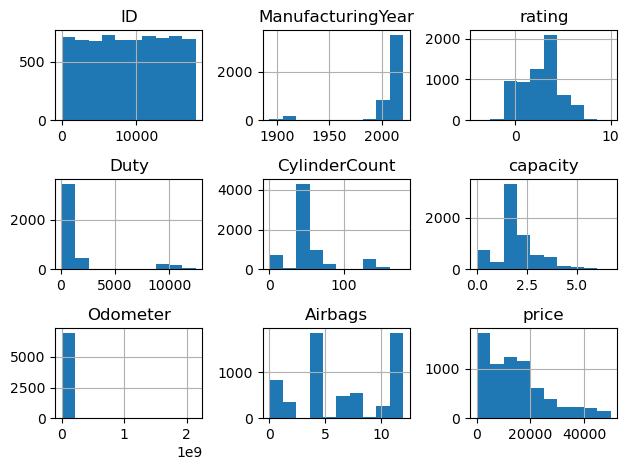

In [49]:
#after cleaning let's saw the new numerical columns
plt.figure(figsize=(12, 6))
df.hist()
plt.tight_layout()
plt.show()

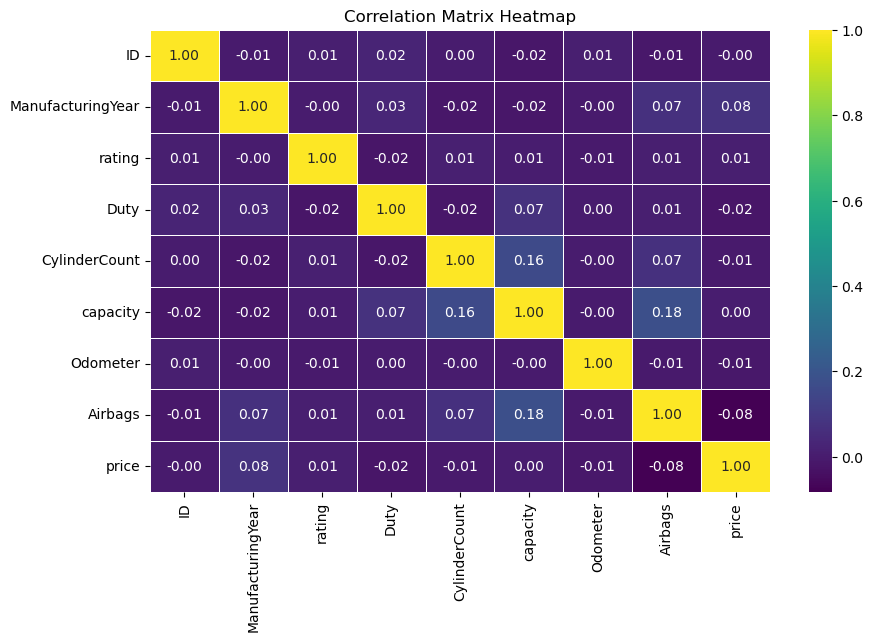

In [50]:
numerical_df = df.select_dtypes(include='number')
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

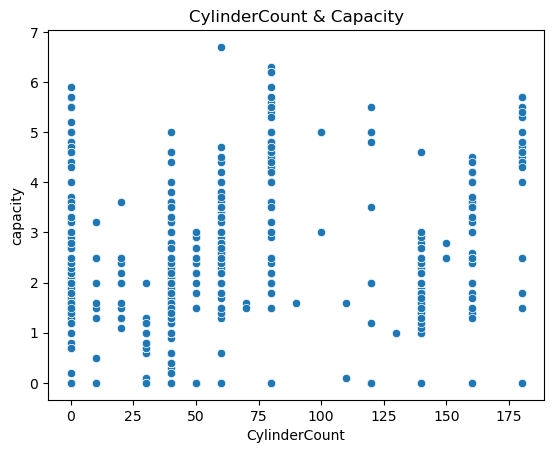

In [51]:
sns.scatterplot(x='CylinderCount',y='capacity',data=df)
plt.title('CylinderCount & Capacity')
plt.show()

**Q1) How the brand affect on price?**

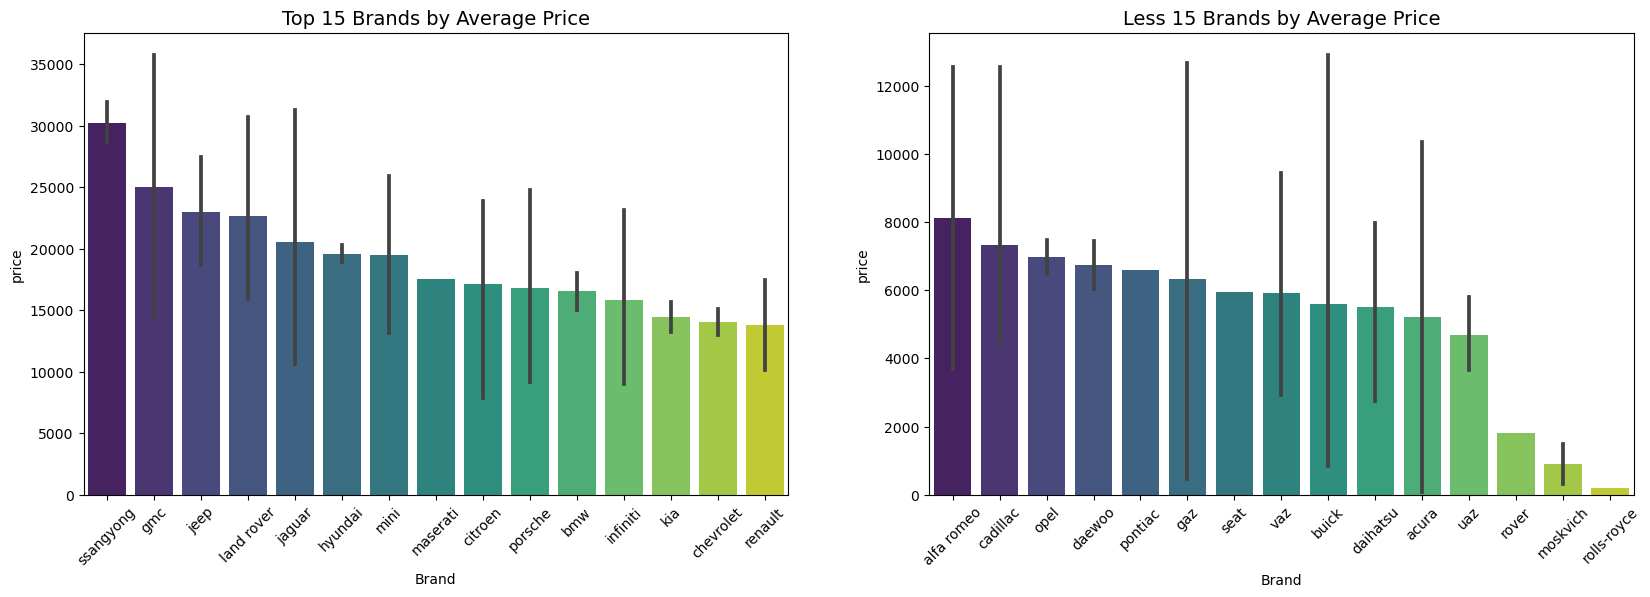

In [52]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Calculate the average price per brand and order by it
brand_order = df.groupby('Brand')['price'].mean().sort_values(ascending=False).index

# Create the first barplot on the first axis
sns.barplot(x='Brand', y='price', order=brand_order[:15], data=df, ax=axs[0],palette='viridis')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, fontsize=10)
axs[0].set_title('Top 15 Brands by Average Price', fontsize=14)

# Create the second barplot on the second axis
sns.barplot(x='Brand', y='price', order=brand_order[-15:], data=df, ax=axs[1],palette='viridis')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, fontsize=10)
axs[1].set_title('Less 15 Brands by Average Price', fontsize=14)
plt.show()


**Q2) What are Manufacturing years that the price of cars are high and low?**

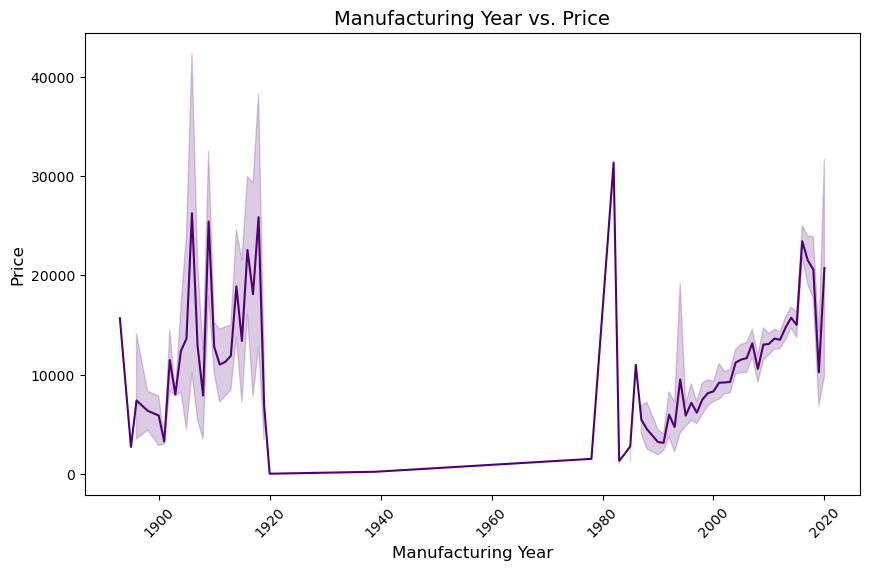

In [53]:
#lineplot: Manufacturing Year vs. Price
plt.figure(figsize=(10, 6))
sns.lineplot(x='ManufacturingYear', y='price', data=df,color='#500073')
plt.title('Manufacturing Year vs. Price', fontsize=14)
plt.xlabel('Manufacturing Year', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=45)
plt.show()

**Q3) What type of car that has a high rate?**

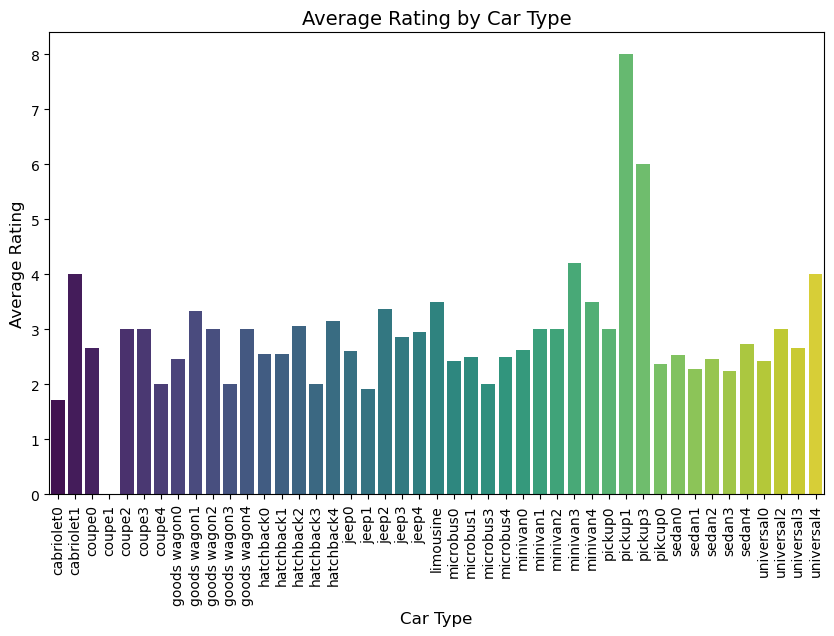

In [54]:

# Aggregate data by Type and calculate the average rating
avg_rating_by_type = df.groupby('Type')['rating'].mean().reset_index()

# Create a bar plot: Average Rating by Car Type
plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y='rating', data=avg_rating_by_type,palette='viridis')

# Title and labels
plt.title('Average Rating by Car Type', fontsize=14)
plt.xlabel('Car Type', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation=90)

# Show the plot
plt.show()

**Q4) How does the car's Duty correlate with the price**

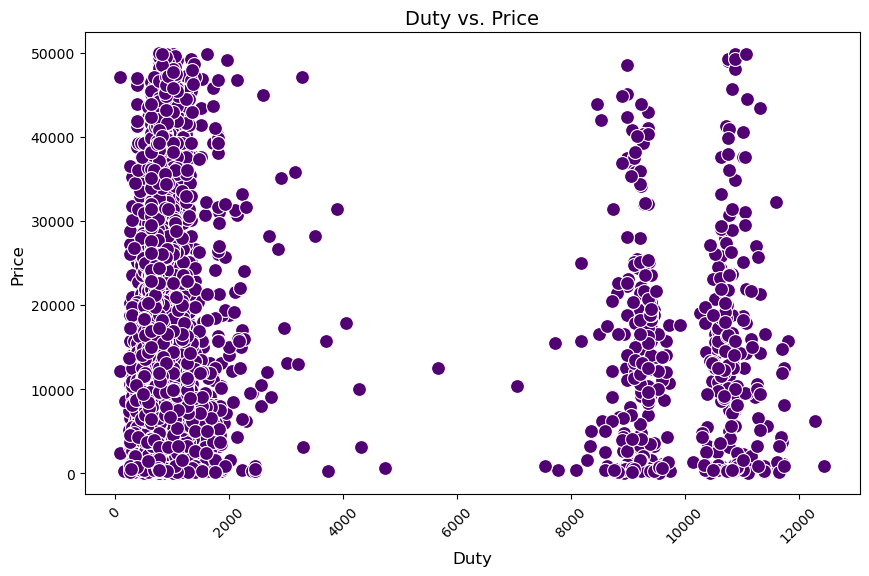

In [55]:
# Scatter plot: Duty vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duty', y='price', data=df, color='#500073', s=100)

# Title and labels
plt.title('Duty vs. Price', fontsize=14)
plt.xlabel('Duty', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=45)

# Show the plot
plt.show()

**Q5) What type of fuel that has high average Odometer and price of the car?**

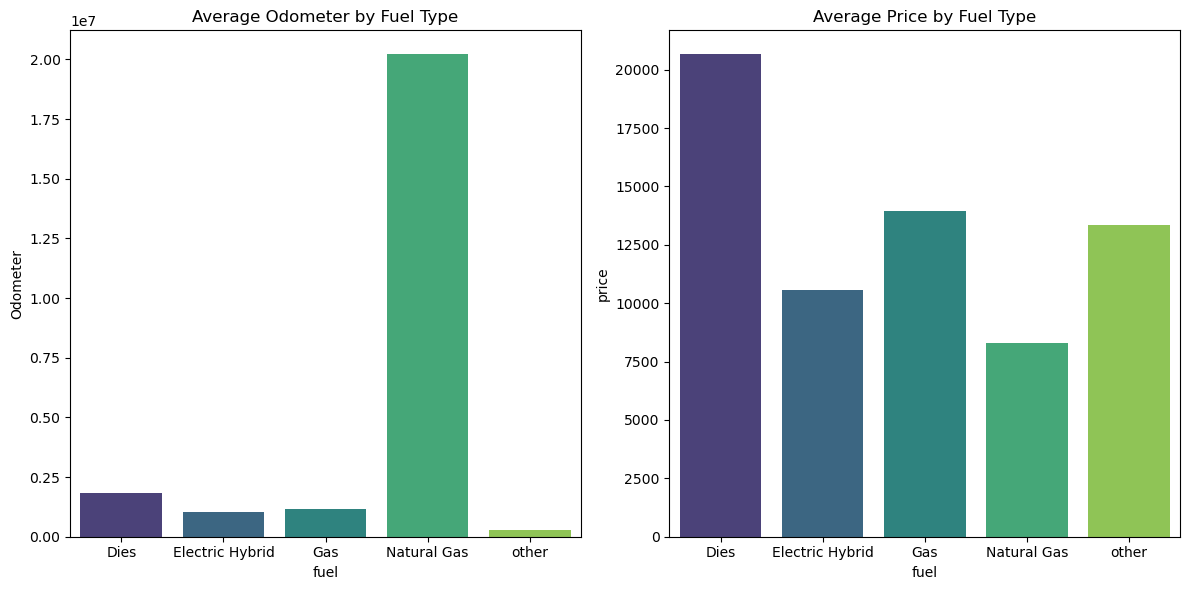

In [56]:
# Group by 'Fuel' and calculate the average of 'Odometer' and 'Price'
avg_data = df.groupby('fuel')[['Odometer', 'price']].mean().reset_index()

plt.figure(figsize=(12, 6))

# Plot for average Odometer by Fuel Type
plt.subplot(1, 2, 1)
sns.barplot(x='fuel', y='Odometer', data=avg_data,palette='viridis')
plt.title('Average Odometer by Fuel Type')

# Plot for average Price by Fuel Type
plt.subplot(1, 2, 2)
sns.barplot(x='fuel', y='price', data=avg_data,palette='viridis')
plt.title('Average Price by Fuel Type')

# Adjust layout
plt.tight_layout()
plt.show()


**Q6) what does the fuel Type of gear have high average Odometer of the car?**

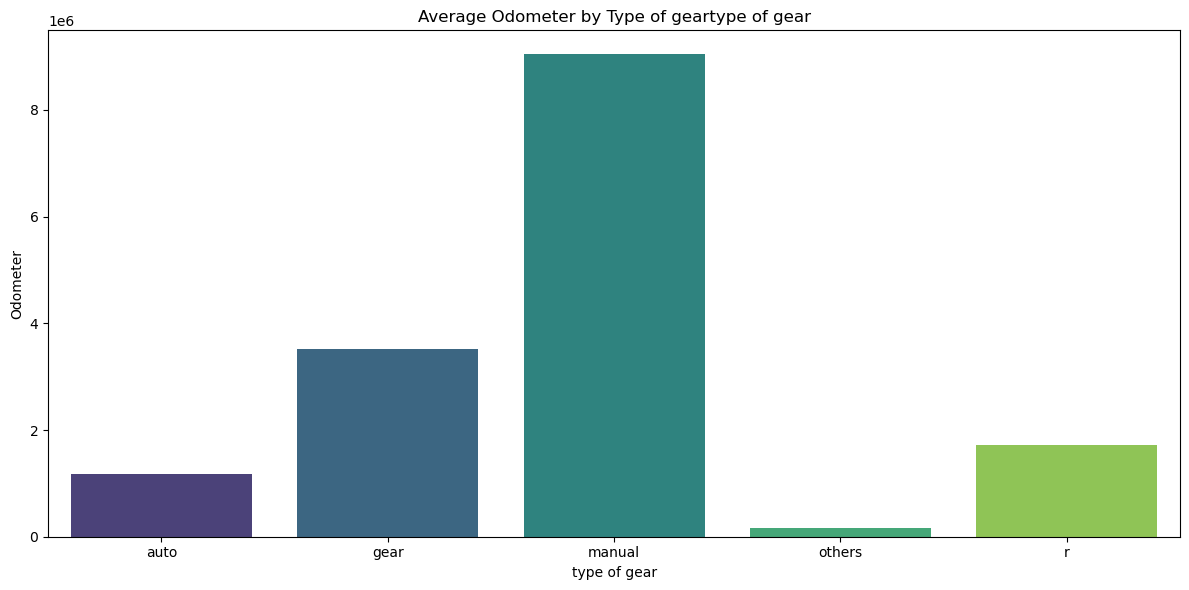

In [57]:
avg_data = df.groupby('type of gear')[['Odometer']].mean().reset_index()

plt.figure(figsize=(12, 6))

# Plot for average Odometer by Fuel Type
sns.barplot(x='type of gear', y='Odometer', data=avg_data,palette='viridis')
plt.title('Average Odometer by Type of geartype of gear')

# Adjust layout
plt.tight_layout()
plt.show()

**Q7) Does the color affect of rating or price?**

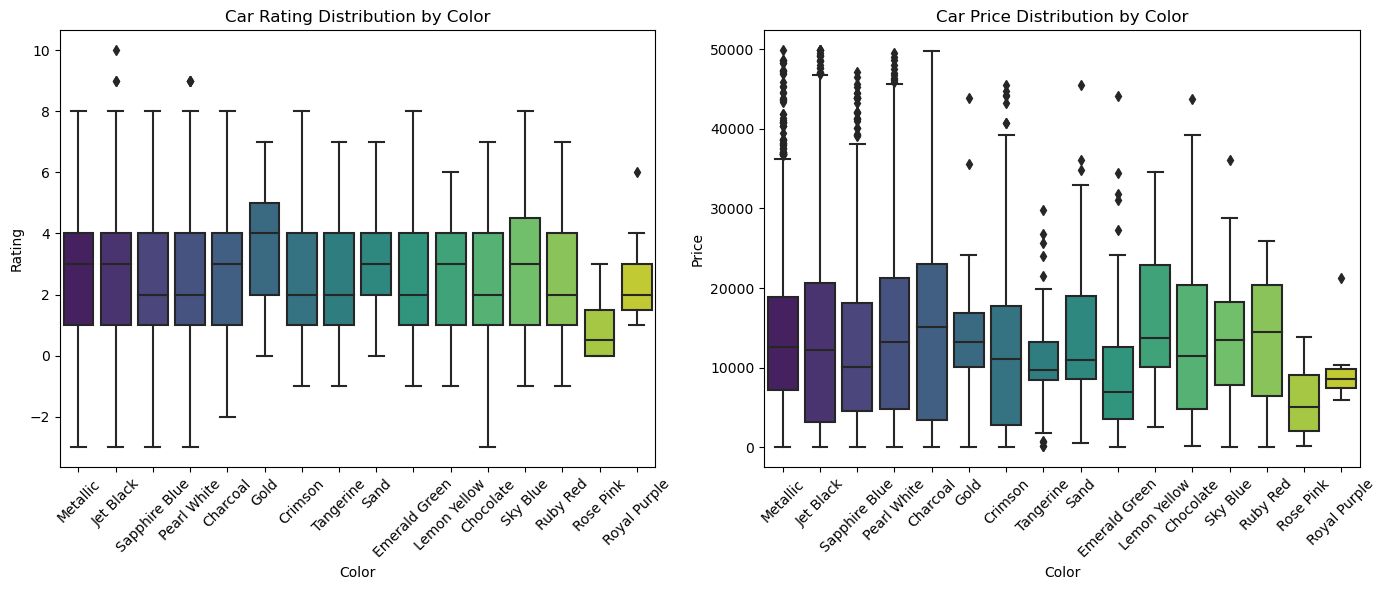

In [58]:
plt.figure(figsize=(14, 6))

# First subplot: Boxplot for Rating by Color
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.boxplot(x='color', y='rating', data=df, palette='viridis')
plt.title('Car Rating Distribution by Color')
plt.xlabel('Color')
plt.ylabel('Rating')
plt.xticks(rotation=45)

# Second subplot: Boxplot for Price by Color
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.boxplot(x='color', y='price', data=df, palette='viridis')
plt.title('Car Price Distribution by Color')
plt.xlabel('Color')
plt.ylabel('Price')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**● there are no reations between columns but there is weak positive cor between clyinder count and capacity**

**● brand of rools-royce have small prices and ssangyong have very high prices of cars**

**● From 1920 to 1980 prices are decreasing and we notice that from late 1980s until 2020, prices have been increasing.** 

**● In 1980 ,2019,1910 and 1915 Manufacturing year are the highest prices**

**● Pickup1 has the highest rate and coupe1 the lowest rate**

**● There are new versions of car types, yet the older versions, like Coupe4, still have the lowest rates. Conversely,
some newer versions, like Jeep4 and Hatchback4, have the highest rates**

**● There are small prices of the cars ,but the duty is very high!**

**● Natural gas is the fuel that has high Odometer and meduim price**
 
**● Dies fuel has the high price but very small Odometer**

**● Manual type of gear has the high Odometer**

**● There are some colors have high mdeuim of price and rating than other colors**

# Feature Engineering

### Pipline

In [59]:
categorical_columns = ['Brand', 'VehicleModel', 'Type', 'color', 'fuel', 'type of gear']
numerical_columns = ['ManufacturingYear', 'rating', 'Duty', 'CylinderCount', 'capacity']
skewed_columns = ['Odometer']
target_columns = ['price']

# Categorical pipeline
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing with mode
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # OneHotEncoder
])

# Numerical pipeline
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Fill missing with median
    ('scaler', StandardScaler())  # StandardScaler
])

# Skewed numerical pipeline (for columns with high skewness)
skewed_numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Fill missing with median
    ('transformer', PowerTransformer())  # Apply PowerTransformer for skewed data
])

# Target pipeline
target_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Fill missing with median
])

# Column transformer
preprocessor = ColumnTransformer([
    ('categorical', categorical_pipeline, categorical_columns),
    ('numerical', numerical_pipeline, [col for col in numerical_columns]),
    ('skewed_numerical', skewed_numerical_pipeline, skewed_columns),
])

### Split Data to Train and Test

In [60]:
# Ensure X and y are properly defined
X = df.drop(['price','ID'], axis=1)  # Features
y = df['price']  # Target

In [61]:
#the size of the data is small so split data to train and test without validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [63]:
y_train_transformed = target_pipeline.fit_transform(y_train.values.reshape(-1, 1))
y_test_transformed = target_pipeline.transform(y_test.values.reshape(-1,1))

# Model

In [64]:

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Regression': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'KNN': KNeighborsRegressor(n_neighbors=5),  # KNN with 5 neighbors
    "Decision Tree": DecisionTreeRegressor(),
    "SGD Regressor": SGDRegressor(),


}

results = []

for name, model in models.items():
    predict=cross_val_predict(model,X_train_transformed,y_train_transformed,cv=3)    
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_train_transformed, predict)
    mse = mean_squared_error(y_train_transformed, predict)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_train_transformed, predict)
    
    results.append({
        "Model Name": name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R² Score": r2
    })

results_df = pd.DataFrame(results)

results_df

,Model Name,MAE,MSE,RMSE,R² Score
0,Linear Regression,8286.318195,1.165314e+08,10794.973066,0.153458
1,Random Forest,6748.836129,8.669898e+07,9311.228805,0.370176
2,Support Vector Regression,9124.063422,1.408051e+08,11866.130822,-0.022878
3,Gradient Boosting,7393.630414,9.471950e+07,9732.394118,0.311911
4,KNN,8516.681607,1.228014e+08,11081.579792,0.107910
5,Decision Tree,8649.011786,1.587942e+08,12601.358275,-0.153560
6,SGD Regressor,8197.920182,1.104712e+08,10510.529235,0.197482


### Fine Tuning

In [65]:
# Hyperparameter distribution
param_dist_rf = {
    'n_estimators': [50, 100,200,500],
    'max_depth': [10, 20,50],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

# Initialize Random Forest
rf = RandomForestRegressor(random_state=42)

# Randomized Search CV
random_search_rf = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=param_dist_rf, 
    n_iter=50, 
    cv=5, 
    random_state=42
)
random_search_rf.fit(X_train_transformed, y_train_transformed)

# Best model
print("Best parameters for Random Forest:", random_search_rf.best_params_)
best_model = random_search_rf.best_estimator_

# Cross-validated predictions
predictions = cross_val_predict(best_model, X_train_transformed, y_train_transformed, cv=5)

# Metrics
mae = mean_absolute_error(y_train_transformed, predictions)
mse = mean_squared_error(y_train_transformed, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_train_transformed, predictions)

# Collect results
results = []
model_name = "Random Forest"
results.append({
    "Model Name": model_name,
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse,
    "R² Score": r2
})

# Results as a DataFrame
results_df = pd.DataFrame(results)
results_df


Best parameters for Random Forest: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}


,Model Name,MAE,MSE,RMSE,R² Score
0,Random Forest,7146.208691,9.001236e+07,9487.484556,0.346106


In [66]:
# Hyperparameter distribution for Gradient Boosting
param_dist_gbr = {
    'n_estimators': [50, 100,200,500],  # Number of boosting stages (trees)
    'learning_rate': [0.01, 0.1,0.2],  # Step size to shrink the contribution of each tree
    'max_depth': [3, 5],  # Maximum depth of the individual trees
    'subsample': [0.8, 0.9],  # Fraction of samples used for fitting trees
    'min_samples_split': [2, 5],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2]  # Minimum samples required at a leaf node
}

# Initialize Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)

# Randomized Search CV for Gradient Boosting
random_search_gbr = RandomizedSearchCV(
    estimator=gbr, 
    param_distributions=param_dist_gbr, 
    n_iter=50,  # Number of random parameter combinations to try
    cv=5,  # Cross-validation splitting strategy
    random_state=42
)
random_search_gbr.fit(X_train_transformed, y_train_transformed)

# Best model
print("Best parameters for Gradient Boosting:", random_search_gbr.best_params_)
best_model_gbr = random_search_gbr.best_estimator_

# Cross-validated predictions
predictions_gbr = cross_val_predict(best_model_gbr, X_train_transformed, y_train_transformed, cv=5)

# Metrics
mae_gbr = mean_absolute_error(y_train_transformed, predictions_gbr)
mse_gbr = mean_squared_error(y_train_transformed, predictions_gbr)
rmse_gbr = np.sqrt(mse_gbr)
r2_gbr = r2_score(y_train_transformed, predictions_gbr)

# Collect results
results_gbr = []
model_name_gbr = "Gradient Boosting"
results_gbr.append({
    "Model Name": model_name_gbr,
    "MAE": mae_gbr,
    "MSE": mse_gbr,
    "RMSE": rmse_gbr,
    "R² Score": r2_gbr
})

# Results as a DataFrame
results_df_gbr = pd.DataFrame(results_gbr)
results_df_gbr


Best parameters for Gradient Boosting: {'subsample': 0.8, 'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 5, 'learning_rate': 0.1}


,Model Name,MAE,MSE,RMSE,R² Score
0,Gradient Boosting,6826.131215,8.792657e+07,9376.917009,0.361258


# Test Model

In [67]:
predict=best_model_gbr.predict(X_test_transformed)
mae = mean_absolute_error(y_test_transformed, predict)
r2 = r2_score(y_test_transformed, predict)
final=[]
final.append({
        "MAE": mae,
        "R² Score": r2
    })

finalresult = pd.DataFrame(final)
finalresult

,MAE,R² Score
0,6455.239682,0.435644


In [68]:
test_ids = df.loc[X_test.index, 'ID']  # Retrieve the 'id' values based on the test set indices

result_df = pd.DataFrame({
    'id': test_ids,  # Keep the 'id' column
    'predicted_price': predict  # Add the predicted prices
})

# Step 5: Save the result to a CSV file
result_df.to_csv('sample_submission_price.csv', index=False)

print("CSV file with 'id' and 'predicted_price' created successfully.")

CSV file with 'id' and 'predicted_price' created successfully.
